In [44]:
import os
import time
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By

In [45]:
from selenium import webdriver


product='anouk kurta'
# define the path to chrome webdriver executable

# initialize the chrome webdriver
driver=webdriver.Chrome()

# # navigate to url

driver.get('https://www.myntra.com/kurta?rowQuery='+product)

# # once the page is loaded, you can extract the page text

myntra_text=driver.page_source

myntra_html=bs(myntra_text, 'html.parser')

'<html lang="en"><head><title>Kurta | Buy Kurta Online in India at Best Price</title><meta name="theme-color" content="#fffff"><link rel="dns-prefetch preconnect" href="https://constant.myntassets.com"><link rel="dns-prefetch preconnect" href="https://assets.myntassets.com"><link rel="dns-prefetch preconnect" href="https//www.googletagmanager.com"><link rel="dns-prefetch preconnect" href="https//www.google-analytics.com"><link rel="dns-prefetch preconnect" href="https//connect.facebook.net"><link rel="dns-prefetch preconnect" href="https://www.facebook.com"><link rel="dns-prefetch preconnect" href="https://touch.myntra.com"><link rel="manifest" href="/manifest.json"><link rel="search" type="application/opensearchdescription+xml" href="https://www.myntra.com/opensearch.xml" title="Myntra Fashion Search"><link rel="apple-touch-icon" href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png">\n      <link rel="preload" as="script" href="https://constant.myntassets.co
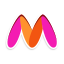

In [46]:
myntra_text

<html lang="en"><head><title>Kurta | Buy Kurta Online in India at Best Price</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon"/>
<link as="script" href="https://constant.myntassets.com/web/asset
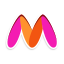

In [47]:
myntra_html

In [48]:
pclass=myntra_html.find_all("ul",{"class":"results-base"})

In [49]:
pclass

[<ul class="results-base"><li class="product-base" id="32366596"><div class="product-thumbShim"></div><div class="product-ratingsContainer"><span>4.1</span><span class="myntraweb-sprite product-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="product-ratingsCount"><div class="product-separator">|</div><!-- react-text: 407 -->564<!-- /react-text --></div></div><a data-refreshpage="true" href="kurtas/sangria/sangria-black-floral-printed-v-neck-thread-work-pure-cotton-straight-kurta/32366596/buy" style="display: block;" target="_blank"><div class="product-imageSliderContainer"><div class="product-sliderContainer" style="display: block;"><div style="background: rgb(229, 241, 255);"><div style="height: 280px; width: 100%;"><picture class="img-responsive" draggable="false" style="width: 100%; height: 100%; display: block;"><source srcset="
     https://assets.myntassets.com/f_webp,dpr_1.0,q_60,w_210,c_limit,fl_progressive/assets/images/2025/J

In [50]:
print(pclass)

[<ul class="results-base"><li class="product-base" id="32366596"><div class="product-thumbShim"></div><div class="product-ratingsContainer"><span>4.1</span><span class="myntraweb-sprite product-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="product-ratingsCount"><div class="product-separator">|</div><!-- react-text: 407 -->564<!-- /react-text --></div></div><a data-refreshpage="true" href="kurtas/sangria/sangria-black-floral-printed-v-neck-thread-work-pure-cotton-straight-kurta/32366596/buy" style="display: block;" target="_blank"><div class="product-imageSliderContainer"><div class="product-sliderContainer" style="display: block;"><div style="background: rgb(229, 241, 255);"><div style="height: 280px; width: 100%;"><picture class="img-responsive" draggable="false" style="width: 100%; height: 100%; display: block;"><source srcset="
    https://assets.myntassets.com/f_webp,dpr_1.0,q_60,w_210,c_limit,fl_progressive/assets/images/2025/JA

In [51]:
len(pclass)

1

In [52]:
# 💡 Reason:
# The structure of the Myntra product listing page is usually like this:


# <ul class="results-base">
#     <li class="product-base">Product 1</li>
#     <li class="product-base">Product 2</li>
#     <li class="product-base">Product 3</li>
#     ...
#     <li class="product-base">Product 55</li>
# </ul>
# This means:

# Only one <ul> tag with class "results-base" is present.

# Inside that one <ul>, all products are listed as <li class="product-base">.

# So when you run:


# pclass = soup.find_all('ul', {'class': 'results-base'})
# → You get a list of one <ul> element. That’s why:

# len(pclass) == 1
# But that one <ul> contains many <li>s, one for each product.

In [53]:
type(pclass)

bs4.element.ResultSet

In [54]:
first_product = pclass[0].find('li', class_='product-base')

# Find the anchor tag inside the first product
link_tag = first_product.find('a', href=True)

# Construct full product link
first_product_link = "https://www.myntra.com/" + link_tag['href']

print("First product link:", first_product_link)

First product link: https://www.myntra.com/kurtas/sangria/sangria-black-floral-printed-v-neck-thread-work-pure-cotton-straight-kurta/32366596/buy


In [55]:
# For First product:(or) 

for ul in pclass: 
    product = ul.find('li', class_='product-base') 
    href=product.find('a', href=True)
    t=(href['href'])
    first_product_link='https://www.myntra.com/'+t
    print(first_product_link)    

https://www.myntra.com/kurtas/sangria/sangria-black-floral-printed-v-neck-thread-work-pure-cotton-straight-kurta/32366596/buy


In [56]:
product_links=[]
for ul in pclass: 
    lis = ul.find_all('li', class_='product-base')
    for li in lis: 
        href=li.find_all('a', href=True)
        t=(href[0]['href'])
        product_link='https://www.myntra.com/'+t
        product_links.append(product_link)


In [57]:
first_product_link

'https://www.myntra.com/kurtas/sangria/sangria-black-floral-printed-v-neck-thread-work-pure-cotton-straight-kurta/32366596/buy'

In [58]:
driver=webdriver.Chrome()

driver.get(first_product_link)
proRes=driver.page_source


'<html lang="en"><head><title>Buy Sangria Black Floral Printed V Neck Thread Work Pure Cotton Straight Kurta  - Kurtas for Women 32366596 | Myntra</title><meta name="theme-color" content="#fffff"><link rel="dns-prefetch preconnect" href="https://constant.myntassets.com"><link rel="dns-prefetch preconnect" href="https://assets.myntassets.com"><link rel="dns-prefetch preconnect" href="https//www.googletagmanager.com"><link rel="dns-prefetch preconnect" href="https//www.google-analytics.com"><link rel="dns-prefetch preconnect" href="https//connect.facebook.net"><link rel="dns-prefetch preconnect" href="https://www.facebook.com"><link rel="dns-prefetch preconnect" href="https://touch.myntra.com"><link rel="manifest" href="/manifest.json"><link rel="search" type="application/opensearchdescription+xml" href="https://www.myntra.com/opensearch.xml" title="Myntra Fashion Search"><link rel="apple-touch-icon" href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png">\n     
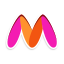

In [59]:
proRes

In [60]:
proRes_html=bs(proRes, 'html.parser')

<html lang="en"><head><title>Buy Sangria Black Floral Printed V Neck Thread Work Pure Cotton Straight Kurta  - Kurtas for Women 32366596 | Myntra</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon
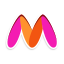

In [61]:
proRes_html

In [62]:
# fetch title of the product

title_h=proRes_html.find_all('title')

In [63]:
title_h

[<title>Buy Sangria Black Floral Printed V Neck Thread Work Pure Cotton Straight Kurta  - Kurtas for Women 32366596 | Myntra</title>]

In [64]:
title=title_h[0].text

In [65]:
title

'Buy Sangria Black Floral Printed V Neck Thread Work Pure Cotton Straight Kurta  - Kurtas for Women 32366596 | Myntra'

In [66]:
product_des=proRes_html.find_all('div',{'class':'pdp-description-container'})

In [67]:
product_des

[<div class="pdp-description-container"><div class="pdp-price-info"><h1 class="pdp-title">Sangria</h1><h1 class="pdp-name">Black Floral Printed V-Neck Thread Work Pure Cotton Straight Kurta</h1><div><div class="index-overallRatingContainer"><div class="index-overallRating"><div>4.1</div><span class="myntraweb-sprite index-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="index-separator">|</div><div class="index-ratingsCount"><!-- react-text: 79 -->564<!-- /react-text --><!-- react-text: 80 --> Ratings<!-- /react-text --></div></div></div><p class="pdp-discount-container"><span class="pdp-price" tabindex="0"><strong>₹608</strong></span><div class="pdp-mrp-verbiage" tabindex="0"><div><b>Price Details</b></div><div><!-- react-text: 88 -->Maximum Retail Price<!-- /react-text --><span class="pdp-mrp-verbiage-amt"><!-- react-text: 90 -->Rs. <!-- /react-text --><!-- react-text: 91 -->2099<!-- /react-text --></span></div><div><!-- react-text: 9

In [68]:
product_des[0].find('span',{'class':'pdp-price'}).find('strong').text

'₹608'

In [69]:
product_des[0].find('h1', {'class':'pdp-title'}).text

'Sangria'

In [70]:
product_des[0].find('div', {'class':'index-overallRating'})

<div class="index-overallRating"><div>4.1</div><span class="myntraweb-sprite index-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="index-separator">|</div><div class="index-ratingsCount"><!-- react-text: 79 -->564<!-- /react-text --><!-- react-text: 80 --> Ratings<!-- /react-text --></div></div>

In [71]:
for i in product_des: 
    product_title=i.find('h1', {'class':'pdp-title'}).text
    product_name=i.find('h1',{'class':'pdp-name'}).text
    product_price=i.find('span',{'class':'pdp-price'}).find('strong').text  

    rating_container = i.find('div', {'class': 'index-overallRating'})
    if rating_container:
        rating_value_div = rating_container.find('div')
        if rating_value_div:
            product_rating_value = rating_value_div.text.strip()
        else:
            product_rating_value = None
    else:
        product_rating_value = None
    
    print(product_title)
    print(product_name)
    print(product_rating_value)
    print(product_price)

Sangria
Black Floral Printed V-Neck Thread Work Pure Cotton Straight Kurta
4.1
₹608


In [72]:
# Find Overall Rating: 
overallRating=proRes_html.find("div",{"class":"index-overallRating"})

In [73]:
overallRating

<div class="index-overallRating"><div>4.1</div><span class="myntraweb-sprite index-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="index-separator">|</div><div class="index-ratingsCount"><!-- react-text: 79 -->564<!-- /react-text --><!-- react-text: 80 --> Ratings<!-- /react-text --></div></div>

In [74]:
len(overallRating)

4

In [75]:
rating=overallRating.find('div').text

In [76]:
rating

'4.1'

In [77]:
bhkj

NameError: name 'bhkj' is not defined

In [ ]:
# find price
price_container=proRes_html.find_all('p',{'class':'pdp-discount-container'})

In [ ]:
price_container

[<p class="pdp-discount-container"><span class="pdp-price" tabindex="0"><strong>₹608</strong></span><div class="pdp-mrp-verbiage" tabindex="0"><div><b>Price Details</b></div><div><!-- react-text: 87 -->Maximum Retail Price<!-- /react-text --><span class="pdp-mrp-verbiage-amt"><!-- react-text: 89 -->Rs. <!-- /react-text --><!-- react-text: 90 -->2099<!-- /react-text --></span></div><div><!-- react-text: 92 -->(Incl. of all taxes)<!-- /react-text --></div><hr/><div><!-- react-text: 95 -->Discount<!-- /react-text --><span class="pdp-mrp-verbiage-amt">71% OFF</span></div><div><b>Selling Price</b><span class="pdp-mrp-verbiage-amt">Rs. 608</span></div><div style="margin: 0px;">(Incl. of all taxes)</div></div><span class="pdp-mrp"><!-- react-text: 102 -->MRP <!-- /react-text --><s><!-- react-text: 104 -->₹<!-- /react-text --><!-- react-text: 105 -->2099<!-- /react-text --></s></span><span class="pdp-discount">(71% OFF)</span></p>]

In [ ]:
for i in price_container: 
    price=i.find('span')
    print(price)
    price=price.find('strong')
    print(price.text)

<span class="pdp-price" tabindex="0"><strong>₹608</strong></span>
₹608


# fetch review

In [ ]:
all_reviews=proRes_html.find('a',{'class':'detailed-reviews-allReviews'})

In [ ]:
all_reviews

<a class="detailed-reviews-allReviews" data-refreshpage="true" href="/reviews/32366596"><!-- react-text: 495 -->View all <!-- /react-text --><!-- react-text: 496 -->58<!-- /react-text --><!-- react-text: 497 --> reviews<!-- /react-text --></a>

In [ ]:
t2=all_reviews['href']

In [ ]:
all_reviews_link= "https://www.myntra.com" + t2

In [ ]:
all_reviews_link

'https://www.myntra.com/reviews/32366596'

In [ ]:
driver.title

'Buy Sangria Black Floral Printed V Neck Thread Work Pure Cotton Straight Kurta - Kurtas for Women 32366596 | Myntra'

In [ ]:
# driver=webdriver.Chrome()


# driver.get(all_reviews_link)

# review_page=driver.page_source

# review_html=bs(review_page, 'html.parser')

# review=review_html.find_all('div', class_='detailed-reviews-userReviewsContainer')
# driver.quit()




# after opening the chrome this will not give the whole review if you will not scroll the  page to the end


In [ ]:
# find whole user review with automated scrolling: 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

def auto_scroll(driver, max_attempts=10):
    last_count = 0
    attempts = 0
    
    while attempts < max_attempts:
        # Scroll to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        # Wait for new content to load
        time.sleep(1.5)  # Adjust based on network speed
        
        # Get current number of visible reviews
        current_count = len(driver.find_elements(By.CSS_SELECTOR, 'div.detailed-reviews-userReviewsContainer'))
        
        # Stop if no new reviews loaded
        if current_count == last_count:
            attempts += 1
        else:
            last_count = current_count
            attempts = 0  # Reset counter when new content loads

        # Optional: Add random delay to mimic human behavior
        # time.sleep(random.uniform(0.5, 2.0))

# Initialize driver
driver = webdriver.Chrome()
driver.get(all_reviews_link)

# Wait for initial content
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, 'div.detailed-reviews-userReviewsContainer'))
)

# Perform automatic scrolling
auto_scroll(driver)

# Parse the fully loaded content
soup = BeautifulSoup(driver.page_source, 'html.parser')
reviews = soup.find_all('div', class_='detailed-reviews-userReviewsContainer')

print(f"Total reviews scraped: {len(reviews)}")
driver.quit()

Total reviews scraped: 1


In [ ]:
reviews

[<div class="detailed-reviews-userReviewsContainer" id="detailedReviewsContainer"><div class="user-review-userReviewWrapper"><div class="user-review-main user-review-showRating"><div class="user-review-starWrapper"><span class="user-review-starRating user-review-fiveStars"><!-- react-text: 180 -->5<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.001c-.553 0-.687.324-.306.716L3.276 7.56l-.766 3.455c-.12.544.165.742.623.45L6 9.645z" fill="#FFF" fill-rule="evenodd"></path></svg></span></span></div><div class="user-review-reviewTextWrapper">It's more prettier than my expectations. The lace border is adding a different level of elegance to it. Love the fit and look 😍❤️ Definitely one of my best purchase from Myntra. 😁</div><div><!-- react-empt

In [ ]:
for i in reviews: 
    user_rating = i.find_all('div', class_='user-review-starWrapper')
    user_comment = i.find_all('div', class_='user-review-reviewTextWrapper')
    user_name_and_date = i.find_all('div', class_='user-review-left')

In [ ]:
user_rating[0].text

'5'

In [ ]:
user_rating

[<div class="user-review-starWrapper"><span class="user-review-starRating user-review-fiveStars"><!-- react-text: 180 -->5<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.001c-.553 0-.687.324-.306.716L3.276 7.56l-.766 3.455c-.12.544.165.742.623.45L6 9.645z" fill="#FFF" fill-rule="evenodd"></path></svg></span></span></div>,
 <div class="user-review-starWrapper"><span class="user-review-starRating user-review-fiveStars"><!-- react-text: 215 -->5<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.

In [ ]:
user_comment[0].text

"It's more prettier than my expectations. The lace border is adding a different level of elegance to it. Love the fit and look 😍❤️ Definitely one of my best purchase from Myntra. 😁"

In [ ]:
user_comment

[<div class="user-review-reviewTextWrapper">It's more prettier than my expectations. The lace border is adding a different level of elegance to it. Love the fit and look 😍❤️ Definitely one of my best purchase from Myntra. 😁</div>,
 <div class="user-review-reviewTextWrapper"></div>,
 <div class="user-review-reviewTextWrapper">Its a very beautiful kurti.. Color, detailing wah❤️🥰👌</div>,
 <div class="user-review-reviewTextWrapper">The colour looks subtle yet fresh. The fabric is cotton and is great for summers if you’re going out as it feels light and breezy. The fitting is comfortable and looks even better if you get to pair it with white trousers/ leggings. </div>,
 <div class="user-review-reviewTextWrapper">Cloth is little thin as compare to its price
 But lookwise very classy 👌
 Keeping it bcz i loved its fit </div>,
 <div class="user-review-reviewTextWrapper">Price is Lil high.. pure cotton fabric.
 Super stylish. Eye soothing colour. Good for summers.</div>,
 <div class="user-review

In [ ]:
user_name_and_date[0].find_all('span')[1].text

'27 Feb 2025'

In [ ]:
user_name_and_date

[<div class="user-review-left"><span>Bratati Sengupta</span><span>27 Feb 2025</span></div>,
 <div class="user-review-left"><span>Kashish Sipaiya</span><span>25 Mar 2025</span></div>,
 <div class="user-review-left"><span>Ameyaa Vaidya</span><span>15 Mar 2025</span></div>,
 <div class="user-review-left"><span>Anusha Srivastava</span><span>30 Mar 2025</span></div>,
 <div class="user-review-left"><span>Aastha Gupta</span><span>15 Mar 2025</span></div>,
 <div class="user-review-left"><span>Myntra Customer</span><span>17 Mar 2025</span></div>,
 <div class="user-review-left"><span>Vaani</span><span>4 Mar 2025</span></div>,
 <div class="user-review-left"><span>Ekta Tripathi</span><span>18 Mar 2025</span></div>,
 <div class="user-review-left"><span>Pratikshya</span><span>2 Mar 2025</span></div>,
 <div class="user-review-left"><span>Aditi</span><span>26 Feb 2025</span></div>,
 <div class="user-review-left"><span>Neha</span><span>6 Mar 2025</span></div>,
 <div class="user-review-left"><span>Sonal

In [ ]:
len(user_rating), len(user_comment), len(user_name_and_date)

(58, 58, 58)

In [ ]:
for i in range(len(user_rating)): 
    rating=user_rating[i].text
    comment=user_comment[i].text
    name=user_name_and_date[i].find('span').text
    date=user_name_and_date[i].find_all('span')[1].text

    print(f"Date:{date}, Rating: {rating}, Name: {name}, comment: {comment}")

Date:27 Feb 2025, Rating: 5, Name: Bratati Sengupta, comment: It's more prettier than my expectations. The lace border is adding a different level of elegance to it. Love the fit and look 😍❤️ Definitely one of my best purchase from Myntra. 😁
Date:25 Mar 2025, Rating: 5, Name: Kashish Sipaiya, comment: 
Date:15 Mar 2025, Rating: 5, Name: Ameyaa Vaidya, comment: Its a very beautiful kurti.. Color, detailing wah❤️🥰👌
Date:30 Mar 2025, Rating: 4, Name: Anusha Srivastava, comment: The colour looks subtle yet fresh. The fabric is cotton and is great for summers if you’re going out as it feels light and breezy. The fitting is comfortable and looks even better if you get to pair it with white trousers/ leggings. 
Date:15 Mar 2025, Rating: 4, Name: Aastha Gupta, comment: Cloth is little thin as compare to its price
But lookwise very classy 👌
Keeping it bcz i loved its fit 
Date:17 Mar 2025, Rating: 4, Name: Myntra Customer, comment: Price is Lil high.. pure cotton fabric.
Super stylish. Eye soot